In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
from IPython.display import display, HTML
import seaborn as sns

In [2]:
SHOW_FIGURES = True

In [3]:
if not SHOW_FIGURES:
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })

In [4]:
file_paths = [
              './results/results_other.csv',
                './results/results_ap.csv',
                './results/results_pmsp.csv',
                './results/results_kbatch_k9.csv',
                './results/hungarian/results.csv',
             ]

In [5]:
csv_dict = []
def load_file(file_path, csv_dict):
    with open(file_path, 'r') as file:
        # Iterate over each line in the fileplt.plot(x_fit, y_fit, color='green', label='Polynomial Approximation')
        for line in file:
            # Split the line content by comma
            line_data = line.strip().split(',')
            if len(line_data) == 19:
                nineteen_keys = ['method', 'start time', 'end time', 'real execution time', 'system execution time',
                                 'delta', 'average make span', 'result message',
                                'makespan', 'resource occupation', 'resource fairness', 'weighted resource fairness',
                                'assigned tasks', 'allocated tasks', 'postponed tasks',
                                'optimal solution', 'feasible solution', 'no solution',
                                'resource worklist rule'
                                ]
                row_dict = dict(zip(nineteen_keys, line_data))
                for k in ['optimal solution', 'feasible solution', 'no solution']:
                    if row_dict[k] == '':
                        row_dict[k] = 0
                csv_dict.append(row_dict)
            else:
                print(len(line_data))

df_dtypes = {'method' : str, 'start time' : str, 'end time' : str, 'real execution time' : float, 'system execution time' : float,
             'delta' : float, 'makespan' : float, 'result message' : str,
             'makespan' : float, 'resource occupation' : float, 'resource fairness' : float, 'weighted resource fairness' : float,
             'assigned tasks' : int, 'allocated tasks' : int, 'postponed tasks' : int,
             'optimal solution' : int, 'feasible solution' : int, 'no solution' : int,
             'resource worklist rule' : str}

for f in file_paths:
    load_file(f, csv_dict)

df = pd.DataFrame(csv_dict)
for k, v in df_dtypes.items():
    df[k] = df[k].astype(v)

In [6]:
pd.option_context('display.max_rows', None, 'display.max_columns', None)  # more options can be specified also
display(HTML(df.to_html()))

,method,start time,end time,real execution time,system execution time,delta,average make span,result message,makespan,resource occupation,resource fairness,weighted resource fairness,assigned tasks,allocated tasks,postponed tasks,optimal solution,feasible solution,no solution,resource worklist rule
0,ShortestQueue,2024-06-04 13:47:38,2024-06-04 13:49:11,93.359247,93.064019,3.00000,1348.9337214877967,COMPLETED: you completed 8760 hours of simulated customer cases. 1449 cases started. 910 cases run to completion.,2147.044891,0.533870,0.060510,121.179048,15204,0,0,0,0,0,
1,ShortestQueue,2024-06-04 13:47:38,2024-06-04 13:49:12,94.617741,94.304061,4.00000,1561.1767018033995,COMPLETED: you completed 8760 hours of simulated customer cases. 1463 cases started. 857 cases run to completion.,2663.958358,0.524813,0.062304,119.631641,14220,0,0,0,0,0,
2,ShortestQueue,2024-06-04 13:47:38,2024-06-04 13:49:26,108.260541,107.907588,1.00000,2146.2087428678883,COMPLETED: you completed 8760 hours of simulated customer cases. 1427 cases started. 880 cases run to completion.,3480.408041,0.519200,0.059544,122.349285,14009,0,0,0,0,0,
3,ShortestQueue,2024-06-04 13:47:38,2024-06-04 13:49:35,117.589165,117.174366,2.00000,1895.7190837415403,COMPLETED: you completed 8760 hours of simulated customer cases. 1676 cases started. 845 cases run to completion.,3759.665557,0.563515,0.067130,120.163690,14735,0,0,0,0,0,
4,ShortestQueue,2024-06-04 13:49:26,2024-06-04 13:51:05,98.195449,97.896861,7.00000,1697.2972111679744,COMPLETED: you completed 8760 hours of simulated customer cases. 1421 cases started. 813 cases run to completion.,2966.550299,0.519445,0.062786,124.974306,14160,0,0,0,0,0,
5,ShortestQueue,2024-06-04 13:49:11,2024-06-04 13:51:05,113.475358,113.126121,5.00000,2054.2312589436433,COMPLETED: you completed 8760 hours of simulated customer cases. 1585 cases started. 802 cases run to completion.,4059.606651,0.520663,0.057054,115.576569,14029,0,0,0,0,0,
6,ShortestQueue,2024-06-04 13:49:13,2024-06-04 13:51:11,118.507793,118.145684,6.00000,2060.421531318693,COMPLETED: you completed 8760 hours of simulated customer cases. 1647 cases started. 785 cases run to completion.,4323.373674,0.532996,0.061903,118.585236,14237,0,0,0,0,0,
7,ShortestQueue,2024-06-04 13:49:35,2024-06-04 13:51:45,130.027803,129.660467,8.00000,2409.4274488081996,COMPLETED: you completed 8760 hours of simulated customer cases. 1739 cases started. 779 cases run to completion.,5375.670208,0.548542,0.070041,125.376337,14134,0,0,0,0,0,
8,ShortestQueue,2024-06-04 13:51:05,2024-06-04 13:52:47,101.928423,101.712770,9.00000,2180.156198294936,COMPLETED: you completed 8760 hours of simulated customer cases. 1660 cases started. 807 cases run to completion.,4483.558040,0.549020,0.069880,126.463776,14237,0,0,0,0,0,
9,Random,2024-06-04 13:54:03,2024-06-04 13:55:47,103.313946,102.938034,4.00000,1825.7402426577037,COMPLETED: you completed 8760 hours of simulated customer cases. 1494 cases started. 834 cases run to completion.,3270.406015,0.569756,0.055737,106.885812,14429,14429,0,0,0,0,


In [7]:
# When more than 10 delta values are present sample 10 random ones
result = df.groupby(['method']).apply(lambda x: x.sample(9)).reset_index(drop=True)
#result
df = result
print(len(df))

63


/tmp/ipykernel_29975/1047646439.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['method']).apply(lambda x: x.sample(9)).reset_index(drop=True)


<Figure size 640x480 with 0 Axes>

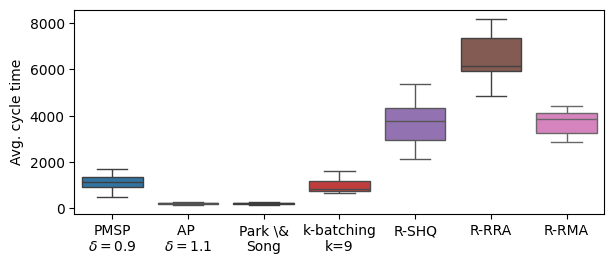

<Figure size 640x480 with 0 Axes>

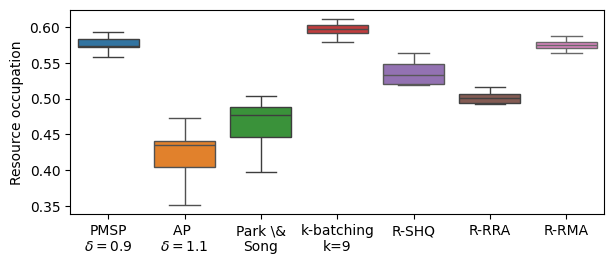

<Figure size 640x480 with 0 Axes>

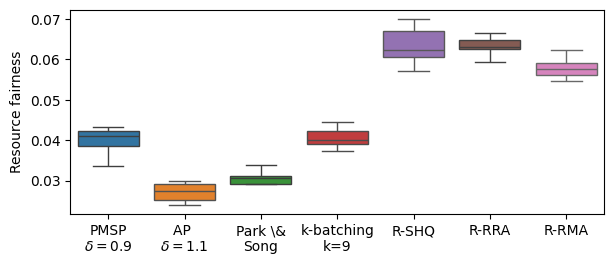

<Figure size 640x480 with 0 Axes>

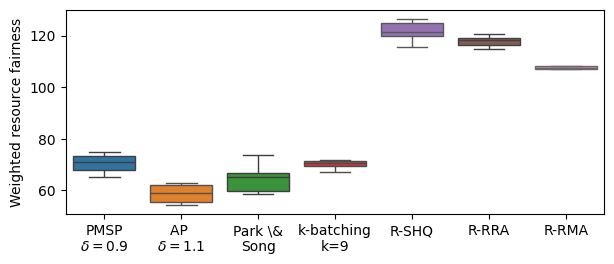

In [8]:

park_df = df[(df['method'] == 'Park')]
sq_df = df[(df['method'] == 'ShortestQueue')]
rr_df = df[(df['method'] == 'RoundRobin')]
ra_df = df[(df['method'] == 'Random')]
kb_df = df[(df['method'] == 'KBatch')]


our_upm_df = df[(df['method'] == 'MILP')]
our_ta_df = df[(df['method'] == 'Hungarian')]


def make_boxplot(y, label=None):
    fig = plt.gcf()
    
    fig,ax = plt.subplots(1)
    fig.set_size_inches(6, 2.5)

    sns.boxplot(y=y, x='method', data=our_upm_df, ax=ax, showfliers=False) 
    sns.boxplot(y=y, x='method', data=our_ta_df, ax=ax, showfliers=False) 
    sns.boxplot(y=y, x='method', data=park_df, ax=ax, showfliers=False)
    sns.boxplot(y=y, x='method', data=kb_df, ax=ax, showfliers=False)
    sns.boxplot(y=y, x='method', data=sq_df, ax=ax, showfliers=False) 
    sns.boxplot(y=y, x='method', data=rr_df, ax=ax, showfliers=False) 
    sns.boxplot(y=y, x='method', data=ra_df, ax=ax, showfliers=False) 

    ax.set(xlabel=None)
    ax.set_xticks([0,1,2,3,4,5,6], ['PMSP\n$\delta=0.9$', 'AP \n$\delta=1.1$', 'Park \&\nSong', 'k-batching\nk=9', 'R-SHQ',
                               'R-RRA', 'R-RMA'])
    if label:
        ax.set(ylabel=label)
    else:
        ax.set(ylabel=y.capitalize())
    
    plt.tight_layout(pad=0.2)
    if SHOW_FIGURES:
        plt.show() 
    else:
        plt.savefig('po_boxplot_' + y + '.pgf')

make_boxplot('makespan', 'Avg. cycle time')
make_boxplot('resource occupation')
make_boxplot('resource fairness')
make_boxplot('weighted resource fairness')




In [9]:
our_upm_df

,method,start time,end time,real execution time,system execution time,delta,average make span,result message,makespan,resource occupation,resource fairness,weighted resource fairness,assigned tasks,allocated tasks,postponed tasks,optimal solution,feasible solution,no solution,resource worklist rule
18,MILP,2024-06-07 20:52:47,2024-06-08 05:38:11,31523.492153,299692.527533,0.9008,1276.4096616176294,COMPLETED: you completed 8760 hours of simulat...,1682.226790,0.571983,0.042773,75.032422,21722,147409,284486,10211,11038,0,fastest
19,MILP,2024-06-07 16:31:46,2024-06-08 00:06:53,27307.242655,225032.622049,0.9006,795.8313012938647,COMPLETED: you completed 8760 hours of simulat...,933.111086,0.558507,0.041039,71.299965,21173,146205,148042,11642,9051,0,fastest
20,MILP,2024-06-07 16:58:18,2024-06-07 20:52:47,14069.224669,102361.097383,0.9007,445.6591216687722,COMPLETED: you completed 8760 hours of simulat...,489.382810,0.532426,0.033697,65.363988,20178,133324,74706,16475,3397,0,fastest
21,MILP,2024-06-07 08:12:53,2024-06-07 15:59:21,27988.401761,229150.029077,0.9000,899.5593575906436,COMPLETED: you completed 8760 hours of simulat...,1124.598867,0.575932,0.041125,71.099388,21144,148147,168289,10565,10091,0,fastest
22,MILP,2024-06-07 15:59:22,2024-06-07 23:11:52,25950.556438,208027.967211,0.9005,834.920951052342,COMPLETED: you completed 8760 hours of simulat...,990.078664,0.572107,0.039056,66.567844,20876,141999,156634,11445,9007,0,fastest
23,MILP,2024-06-07 23:11:53,2024-06-08 04:49:59,20285.272545,215066.787016,0.9010,619.8459756216413,COMPLETED: you completed 8760 hours of simulat...,687.104122,0.584655,0.038640,70.265825,21347,149167,122335,14288,6581,0,fastest
24,MILP,2024-06-07 08:12:53,2024-06-07 16:58:17,31524.393946,244600.078693,0.9002,1147.0691463096982,COMPLETED: you completed 8760 hours of simulat...,1449.721351,0.582739,0.043167,73.445430,21546,151023,226210,9523,11551,0,fastest
25,MILP,2024-06-07 23:00:09,2024-06-08 06:24:42,26673.652646,343156.179136,0.9009,1028.5852383260092,COMPLETED: you completed 8760 hours of simulat...,1254.799685,0.592847,0.042186,73.501367,21832,148469,234844,12725,8705,0,fastest
26,MILP,2024-06-07 08:12:53,2024-06-07 16:31:45,29932.296771,230223.271605,0.9003,1120.6862763734448,COMPLETED: you completed 8760 hours of simulat...,1371.815543,0.573544,0.038097,68.107407,21263,144005,244069,10389,10474,0,fastest


<Figure size 640x480 with 0 Axes>

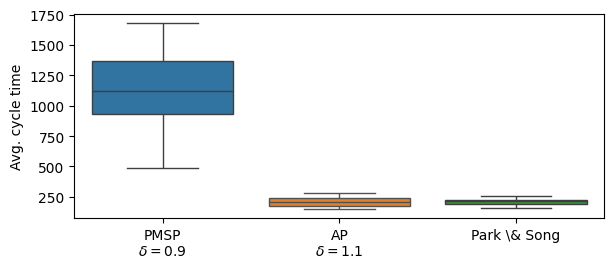

<Figure size 640x480 with 0 Axes>

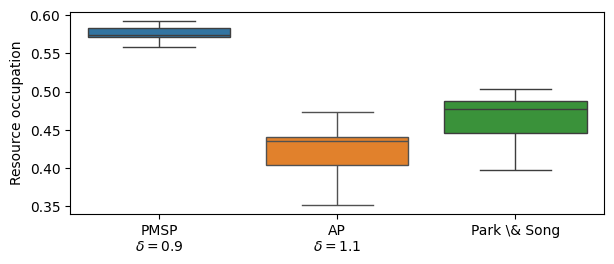

<Figure size 640x480 with 0 Axes>

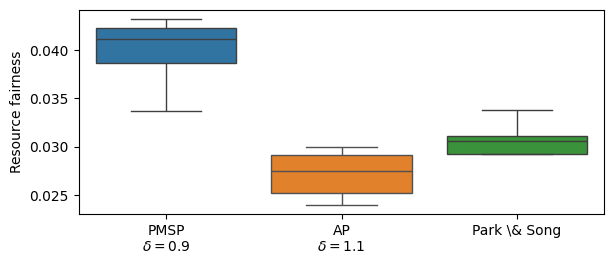

<Figure size 640x480 with 0 Axes>

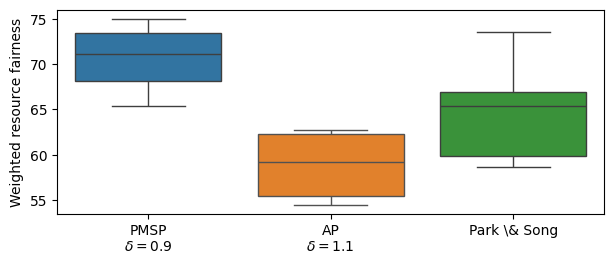

In [10]:
def make_boxplot(y, label=None):
    fig = plt.gcf()
    
    fig,ax = plt.subplots(1)
    fig.set_size_inches(6, 2.5)
    sns.boxplot(y=y, x='method', data=our_upm_df, ax=ax, showfliers=False) 
    sns.boxplot(y=y, x='method', data=our_ta_df, ax=ax, showfliers=False) 
    sns.boxplot(y=y, x='method', data=park_df, ax=ax, showfliers=False) 


    ax.set(xlabel=None)
    ax.set_xticks([0,1,2], ['PMSP\n$\delta=0.9$', 'AP\n$\delta=1.1$', 'Park \& Song'])
    if label:
        ax.set(ylabel=label)
    else:
        ax.set(ylabel=y.capitalize())
    
    plt.tight_layout(pad=0.2)
    if SHOW_FIGURES:
        plt.show() 
    else:
        plt.savefig('po_boxplot_3_' + y + '.pgf')

make_boxplot('makespan', 'Avg. cycle time')
make_boxplot('resource occupation')
make_boxplot('resource fairness')
make_boxplot('weighted resource fairness')